In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [10]:
dataset = pd.read_csv('linear_interpolation_removed.csv')
dataset = dataset.drop(columns='market_cap')
dataset = dataset.drop(columns='total_volume')
dataset['snapped_at'] = pd.to_datetime(dataset['snapped_at'])    
dataset['snapped_at'] = (dataset['snapped_at'] - dataset['snapped_at'].min())  / np.timedelta64(1,'D')
dataset.head()
X = dataset.iloc[:,0:1].values
y = dataset.iloc[:,1].values

In [11]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = np.array(X).reshape(-1,1)
X = sc_X.fit_transform(X)
y = np.array(y).reshape(-1,1)
y = sc_y.fit_transform(y)

In [12]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X, y)

c:\Users\Daan\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [13]:
y_pred = sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])).reshape(1,-1))

C:\Users\Daan\AppData\Local\Temp\ipykernel_236\2028830799.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.01) #this step required because data is feature scaled.


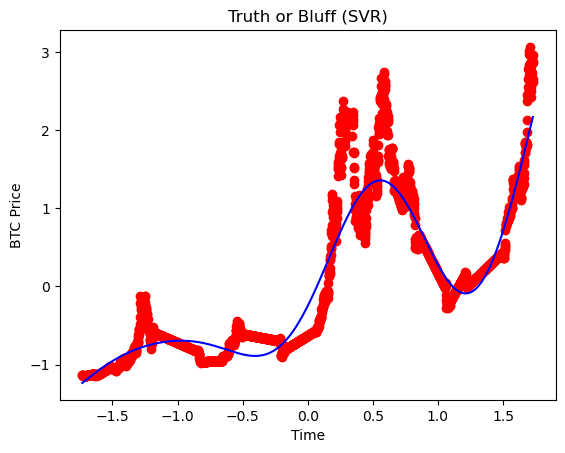

In [14]:
X_grid = np.arange(min(X), max(X), 0.01) #this step required because data is feature scaled.
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Time')
plt.ylabel('BTC Price')
plt.show()